In [61]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [62]:
print("Quantidade de amostras de treino: " + str(len(x_train)))
print("Quantidade de valores alvo de treino: " + str(len(y_train)))
print("Quantidade de amostras de teste: " + str(len(x_test)))
print("Quantidade de valores alvo de teste: " + str(len(y_test)))
print()
print("Dimensão dos dados de treino: " + str(x_train[0].shape))
print("Forma dos valores alvo de treino" + str(y_train.shape))
print()
print("Dimensão dos dados de teste: " + str(x_test[0].shape))
print("Forma dos valores alvo de teste" + str(y_test.shape))

Quantidade de amostras de treino: 60000
Quantidade de valores alvo de treino: 60000
Quantidade de amostras de teste: 10000
Quantidade de valores alvo de teste: 10000

Dimensão dos dados de treino: (28, 28)
Forma dos valores alvo de treino(60000,)

Dimensão dos dados de teste: (28, 28)
Forma dos valores alvo de teste(10000,)


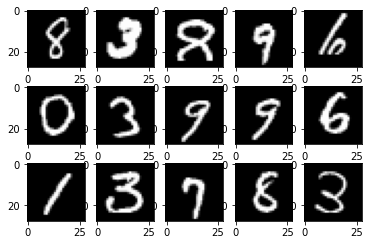

In [63]:
import matplotlib.pyplot as plt
import numpy as np
#Mostrando 15 imagens aleatórioas do conjunto de dados de treino
#plt.figure(figsize=(20,10))
for i in range(15):

    plt.subplot(3,5,i+1)
    random_num = np.random.randint(0,len(x_test))
    plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [64]:
#Temos que adicionar uma quarta dimensão aos dados para
#Entrar no formato exigido pelo keras
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)
#Convertendo os valores oara float entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("Forma dos dados de treino: " + str(x_train.shape))
print("Quantidade de amostras de treino: " + str(x_train.shape[0]))
print("Quantidade de amostras de teste: " + str(x_test.shape[0]))

Forma dos dados de treino: (60000, 28, 28, 1)
Quantidade de amostras de treino: 60000
Quantidade de amostras de teste: 10000


In [65]:
#Transformar os valores alvo em um vetor de tamanho igual as possibilidades que uma amostra pode assumir
#Nesse vetor somente o posição correspondente ao valor alvo de uma amostra possuirá valor 1, restante 0
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
          
model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              